<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Baseball-Run-Values-from-Regression" data-toc-modified-id="Baseball-Run-Values-from-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Baseball Run Values from Regression</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Our-first-regression-model" data-toc-modified-id="Our-first-regression-model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Our first regression model</a></span><ul class="toc-item"><li><span><a href="#Stolen-Base-Breakeven-Probability" data-toc-modified-id="Stolen-Base-Breakeven-Probability-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Stolen Base Breakeven Probability</a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Residuals</a></span></li></ul></li><li><span><a href="#Are-Ks-more-costly-than-other-outs?" data-toc-modified-id="Are-Ks-more-costly-than-other-outs?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Are Ks more costly than other outs?</a></span></li><li><span><a href="#What-happens-if-we-only-use-a-year-of-data?" data-toc-modified-id="What-happens-if-we-only-use-a-year-of-data?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>What happens if we only use a year of data?</a></span></li><li><span><a href="#What-happens-if-we-only-use-a-single-variable?" data-toc-modified-id="What-happens-if-we-only-use-a-single-variable?-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>What happens if we only use a single variable?</a></span></li></ul></li><li><span><a href="#Four-Factor-Model" data-toc-modified-id="Four-Factor-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Four Factor Model</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Four-Factors-and-Winning-Pct" data-toc-modified-id="Four-Factors-and-Winning-Pct-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Four Factors and Winning Pct</a></span></li><li><span><a href="#Four-Factors-and-the-log-Rating-Ratio" data-toc-modified-id="Four-Factors-and-the-log-Rating-Ratio-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Four Factors and the log Rating Ratio</a></span><ul class="toc-item"><li><span><a href="#As-before,-what-if-only-include-one-variable-in-the-regression?" data-toc-modified-id="As-before,-what-if-only-include-one-variable-in-the-regression?-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>As before, what if only include one variable in the regression?</a></span></li></ul></li><li><span><a href="#By-Games" data-toc-modified-id="By-Games-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>By Games</a></span></li></ul></li><li><span><a href="#Plus/Minus-Regression" data-toc-modified-id="Plus/Minus-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plus/Minus Regression</a></span><ul class="toc-item"><li><span><a href="#Stint-data" data-toc-modified-id="Stint-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Stint data</a></span></li><li><span><a href="#Stint-Data-for-Regression" data-toc-modified-id="Stint-Data-for-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Stint Data for Regression</a></span></li><li><span><a href="#Adjusted-Plus/Minus" data-toc-modified-id="Adjusted-Plus/Minus-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Adjusted Plus/Minus</a></span></li><li><span><a href="#Penalizing-the-Least-Squares-Fit:-Regularized-Adjusted-Plus-Minus-(xRAPM)" data-toc-modified-id="Penalizing-the-Least-Squares-Fit:-Regularized-Adjusted-Plus-Minus-(xRAPM)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Penalizing the Least Squares Fit: Regularized Adjusted Plus Minus (xRAPM)</a></span></li><li><span><a href="#How-penalizing-the-coefficients-cleans-things-up" data-toc-modified-id="How-penalizing-the-coefficients-cleans-things-up-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>How penalizing the coefficients cleans things up</a></span></li><li><span><a href="#Compare-to-ESPN's-RPM" data-toc-modified-id="Compare-to-ESPN's-RPM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Compare to ESPN's RPM</a></span></li></ul></li></ul></div>

# Regression Modeling

This demo goes over regression modeling and how we can use it to compute run values and the four factor model like we've already seen.  We'll also see how we can use regression modeling to compute a sophisticated Plus/Minus Rating model that greatly improves on conventional Plus/Minus.

In [1]:
%matplotlib inline
import datascience as ds
import matplotlib.pyplot as plt
import numpy as np

from regression_helper import multiple_regression

## Baseball Run Values from Regression

Recall the formula for Linear Weights:
$$
  \text{Runs Above Average} = .46\cdot \mathit{1B} + .80\cdot \mathit{2B} + 1.02\cdot \mathit{3B} + 1.40\cdot \mathit{HR} + .33\cdot (\mathit{BB} + \mathit{HBP}) - .25\cdot \mathit{O}
$$

We directly computed the run values for the events through a simple and elegant computation with the play-by-play data.  But there's nothing that stops us from trying to compute the run values through regression.  LWTS is a linear model, after all.

It turns out, using season level data for teams we can do pretty well estimating the run values.

### Load Data

Similar to what we've seen before, we're goint to use the Lahman dataset but cleaned a bit for ease of use with our helper function.  In particular, some columns have been renamed, some extra have been computed, and many have been dropped.

In [2]:
# Load lahman_teams.csv obtained from the lahman_main databank. 
# This table is a slight modification of the regular table.
lahman = ds.Table.read_table("lahman_teams.csv", sep=',')
lahman.show(5)

yearID,franchID,R,RAA,O,O_nonK,SO,X1B,X2B,X3B,HR,BB,HBP,SB,CS
2000,ANA,864,125.329,4054,3030,1024,995,309,34,236,608,47,93,52
2000,ARI,792,53.3294,4061,3086,975,961,282,44,179,535,59,97,44
2000,ATL,810,71.3294,3999,2989,1010,1011,274,26,179,595,59,148,56
2000,BAL,794,55.3294,4041,3141,900,992,310,22,184,558,49,126,65
2000,BOS,792,53.3294,4127,3108,1019,988,316,32,167,611,42,43,30


### Our first regression model

Let's build our first regression model.  We need to tell the function `multiple_regression` which is the dependent variable (the observation) and the independent variables (the inputs).

The dependent variable is going to be Runs Above Average and the independent variables will be the events.

Comparing the regression to the run values we obtained earlier, we find pretty similar results.  It's hard to argue wih the effectiveness of the regression.

| Event | Run Value |
| ----------------- |
|  Out  |  -0.287   |
|  1B   |   0.462   |
|  2B   |   0.781   |
|  3B   |   1.085   |
|  HR   |   1.383   |
|  BB   |   0.306   |
|  HBP  |   0.336   |

From FanGraphs, the run values for SB and CS are .2 and -(2 * run_per_out + 0.075) (generally about -.4).  Our findings align pretty well with that.

We could have used additional variables for the regression.  We're a bit limited based on the Lahman dataset so we cannot distinguish between regular walks and intentional walks, or fielder's choice, or reaching base on an error.  Luckily we've got most of the events and the most important ones at that.

In [3]:
dep_vars = 'RAA'
ind_vars = ['O', 'X1B', 'X2B', 'X3B', 'HR', 'BB', 'HBP', 'SB', 'CS']
coefs, predictions, errors = multiple_regression(dep_vars, ind_vars, lahman)
lahman['regress_errors'] = errors
lahman['regress_predictions'] = predictions
coefs

{'BB': 0.28638321301612712,
 'CS': -0.38989776186549929,
 'HBP': 0.33304169100271158,
 'HR': 1.4338161249074193,
 'O': -0.2720135548403862,
 'SB': 0.18417972795862578,
 'X1B': 0.47544693639011071,
 'X2B': 0.74304556503735408,
 'X3B': 1.0736700743249656}

#### Stolen Base Breakeven Probability

The breakeven probability for a stolen base tells us how likely a stolen base needs to be to make it an even proposition in terms of run expectancy.  Research has shown that some poorly constructed regression models can fail to provide a properly calibrated model with respect to the breakeven probability.  Our model is pretty close to what we should expect, which is about 70%.

In [4]:
np.abs(coefs['CS']) / (coefs['SB'] + np.abs(coefs['CS']))

0.6791727053867741

#### Residuals
We can look a scatterplot between RAA and the errors from the regression.  The doesn't look eggregiously bad so it looks like we're doing a fair job of capturing run scoring with the events we have used.

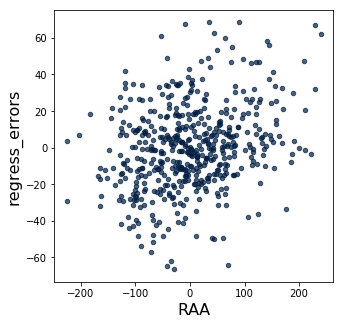

In [5]:
lahman.scatter('RAA', select='regress_errors')

### Are Ks more costly than other outs?

Among other variables we could have used is the strikeout.  Presumably striking out and not putting the ball in play, even if it results in an out, should be less valuable.  So is there much of a distinction between regular outs and strikeouts?

The evidence is not strong that it's hugely different in value but the diffence is slightly larger in magnitude than
what we computed using play-by-play data.


| Event | Run Value |
| ----------------- |
|  Out  |  -0.287   |
|   K   |  -0.292   |

In [6]:
ind_vars_with_K = ['O_nonK', 'SO', 'X1B', 'X2B', 'X3B', 'HR', 'BB', 'HBP', 'SB', 'CS']
coefs_with_K, _, _ = multiple_regression(dep_vars, ind_vars_with_K, lahman)
coefs_with_K

{'BB': 0.28662643975427976,
 'CS': -0.40902665944231753,
 'HBP': 0.33341587621274904,
 'HR': 1.4365313988000503,
 'O_nonK': -0.26123185080084926,
 'SB': 0.18928883043990463,
 'SO': -0.28016407211535588,
 'X1B': 0.45417865157588777,
 'X2B': 0.73163384286994326,
 'X3B': 1.0905362177967339}

### What happens if we only use a year of data?

We used all years since 2000 to build our regression.  What if we want to compute the run values for a single year, say 2016?  Let's sluff off the rest of the data and run our regression.

In [7]:
lahman_2016 = lahman.where('yearID', 2016)
lahman_2016['RAA'] = lahman_2016['R'] - lahman_2016['R'].mean()
coefs_2016, _, _ = multiple_regression(dep_vars, ind_vars, lahman_2016)
coefs_2016

{'BB': 0.18655221577597061,
 'CS': -0.0053071858808910743,
 'HBP': 0.53596880172996053,
 'HR': 1.3140872972712316,
 'O': -0.25989264826683811,
 'SB': 0.13498240576980014,
 'X1B': 0.38322356997502072,
 'X2B': 1.1326424996671227,
 'X3B': 0.83704803308973874}

The end result is not good.  We don't know the ground truth but we have a good idea of where things should be and in this case, some of these values are ludicrous.  The value of a double is way off, especially given that it's worth more than a triple.  The values for HBP and BB are out of whack too.  Most alarmingly, the value for CS is now positive.

So what happened?  

Not enough data.  That's pretty much it.  One season of MLB has only 30 observations and we tried to estimate 9 coeffients.  30 data points would possibly be okay if we wanted to measure 1 effect.  But 9 simultaneous effects?  No way.

The play-by-play method worked for a single season but this regression approach requires multiple years.  This is not great if we want to capture changing run environments.  A potential solution (if we wanted to continue with regression modeling) would be to build a regression using the play-by-play data.  That would be enough data.

### What happens if we only use a single variable?

Let's return to our data for the 2000s but now we'll explore an important phenomenon with regression modeling: misspecification.

The underlying mathematical theory says that if you have all the independent variables that the observation depends on (and among other assumptions the true model is linear), regression modeling will properly estimate the coefficients of the model.

So far we've seen regression models that do pretty well because we're doing a pretty good job of specifying the model.  Let's see just how the regression could have produced junk results if we did not properly specify the regression model.

We specify an constant term in `multiple_regression` because it provides an intercept to the regression line, which is very much needed as indicated by the scatter plot.

{'Intercept': 227.41671011042573, 'SO': -0.20186847358573679}

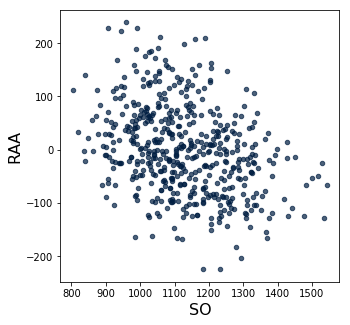

In [8]:
dep_vars = 'RAA'
ind_vars = 'SO'
coefs, predictions, errors = multiple_regression(dep_vars, ind_vars, lahman, constant=True)
lahman.scatter(ind_vars, select=dep_vars)
coefs

While it feels like we should have been able to estimate the individual effects of the events, the poor results show that the simultaneous effects of the different events make it so that you definitely need to incorporate all the events to get proper results.

This is huge part of any statistical study using regression: you need to collect as much information as you can that likely is relevant because if you fail to account for relevant information, your results will likely be corrupted and erroneous.

## Four Factor Model

Recall Dean Oliver's four factor model for basketball:
\begin{align*}
  \text{Team Performance} & = .4 \cdot Z(\mathit{eFG\%} -  \mathit{eFG\%}_{\text{Opp}}) \\
  & \quad - .25 \cdot Z(\text{Turnover Rate} - \text{Turnover Rate}_{\text{Opp}}) \\
  & \quad + .2 \cdot Z(\mathit{OREB\%} -  \mathit{OREB\%}_{\text{Opp}}) \\
  & \quad  + .15 \cdot Z(\text{FT Rate} - \text{FT Rate}_{\text{Opp}})
\end{align*}

The model tried to explain team performance through four fundamental factors.  Dean Oliver prescribed his own relative importance to the factors as 40% for efficient shooting, 25% for turnovers, 20% for rebounding, and 15% for free throw attempts.   Where did Dean Oliver get those values?  Are they the best?

We don't know where he got those values but we can see what regression says for the relative importance.

### Load Data

We'll use similar data we used before but cleaned up to have the just the four factors and other relevant data.

Recall the two values:
\begin{align*}
  \text{Rating Ratio} & = \frac{\text{Off. Rating}}{\text{Def. Rating}} \\
  \text{Log Rating Ratio} & = \log\text{Rating Ratio}
\end{align*}

In [9]:
nba_teams_full = ds.Table.read_table('team_season_ff_data.csv', sep=',')

nba_teams = nba_teams_full.where('season', ds.are.above_or_equal_to(2000))
nba_teams.show(5)

team,season,win_pct,rtg_rat,log_rtg_rat,eFG,Tov,Reb,Ftr
ORL,2000,0.52439,1.01077,0.0107161,0.380505,-1.29962,-0.374888,-2.11406
OKC,2000,0.536585,1,0,0.0833955,0.241673,-0.335741,0.544216
UTA,2000,0.646341,1.05078,0.0495339,0.876757,-0.388508,1.10737,-0.801943
CHI,2000,0.182927,0.905871,-0.0988579,-1.82404,0.602356,-1.02293,-0.950757
CLE,2000,0.365854,0.956149,-0.0448418,-0.652338,0.958817,0.290324,-0.252797


### Four Factors and Winning Pct

Let's first look at a model for winning percentage using the four factors.  Since winning percentage is centered around .500, we need to include a constant term to center our model.

In [10]:
dep_vars = 'win_pct'
ind_vars = ['eFG', 'Tov', 'Reb', 'Ftr']
coefs, _, _ = multiple_regression(dep_vars, ind_vars, nba_teams, constant=True)
coefs

{'Ftr': 0.034652607257466356,
 'Intercept': 0.50005666845551222,
 'Reb': 0.039496708859596649,
 'Tov': -0.058226279568261,
 'eFG': 0.1226533269183806}

We can rescale the non-intercept coefficients to sum to 100 in absolute value so they are relative percentages, as Dean Oliver used.  We got reasonably close to Dean Oliver's prescribed values but it turns out that our model suggests lower weights for **Tov**, **Reb**, and **FTR** in exchange for more importance for **eFG**.

In [11]:
factor_coefs = np.array([0.1227, -0.0582, 0.0395, 0.0346])
factor_coefs / np.abs(factor_coefs).sum() * 100

array([ 48.11764706, -22.82352941,  15.49019608,  13.56862745])

### Four Factors and the log Rating Ratio

We can also look at our ole Pythagorean Expectation pal the log rating ratio.  There is no need for an intercept for the log rating ratio since it's centered very close to 0.

Perhaps not shockingly, we get similar results for the relative importance.  The **eFG** factor again is more relevant according to this regression.

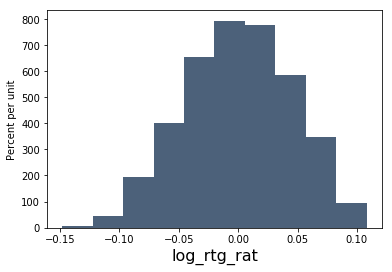

In [12]:
nba_teams.hist('log_rtg_rat')

In [13]:
dep_vars = 'log_rtg_rat'
ind_vars = ['eFG', 'Tov', 'Reb', 'Ftr']
coefs, _, _ = multiple_regression(dep_vars, ind_vars, nba_teams, constant=True)
coefs

{'Ftr': 0.010432195259326038,
 'Intercept': 4.1416575123896706e-05,
 'Reb': 0.012797456466873629,
 'Tov': -0.018183755455918466,
 'eFG': 0.037733556027590834}

In [14]:
factor_coefs = np.array([0.0377, -0.0182, 0.0128, 0.0104])
factor_coefs / np.abs(factor_coefs).sum() * 100

array([ 47.66118837, -23.00884956,  16.18204804,  13.14791403])

#### As before, what if only include one variable in the regression?

The resulting coefficients from the misspecified models are all off, and not in a consistent direction.

In [15]:
dep_vars = 'log_rtg_rat'
ind_vars = 'Ftr'
coefs_misspecified, _, _ = multiple_regression(dep_vars, ind_vars, nba_teams)
coefs_misspecified[ind_vars], coefs[ind_vars]

(0.019097591027970269, 0.010432195259326038)

### By Games

If you recall, the four factor model was also effective for explaning game performance.  Compared to the season level, the performance was quite similar though the games just had more variation.  The regression should still be more effective.  How does that play out here?

In [16]:
games = ds.Table.read_table('game_ff_data_2016.csv', sep=',')
games.show(5)

GAME_ID,TEAM_NAME,OPP_TEAM_NAME,log_rtg_rat,eFG,Tov,Reb,Ftr
21600001,Knicks,Cavaliers,-0.23113,-1.39259,0.751141,-0.344226,0.335651
21600002,Jazz,Trail Blazers,-0.128505,-0.760523,0.0711826,-0.0157859,-0.67614
21600003,Spurs,Warriors,0.239358,0.318357,-0.448785,2.34126,0.536404
21600004,Magic,Heat,-0.09106,-0.967581,-0.148804,-0.576067,1.31532
21600005,Pacers,Mavericks,0.0798197,0.438232,0.191175,-0.199326,1.66062


For 2016, the weight is just a bit more on eFG.  But it appears generally consistent with season level.

In [17]:
dep_vars = 'log_rtg_rat'
ind_vars = ['eFG', 'Tov', 'Reb', 'Ftr']
coefs, _, _ = multiple_regression(dep_vars, ind_vars, games)
coefs

{'Ftr': 0.024295414915050502,
 'Reb': 0.051561693830323857,
 'Tov': -0.059406457503157532,
 'eFG': 0.13357198257802982}

In [18]:
factor_coefs = np.array([0.1336, -0.0594, 0.0516, 0.0243])
factor_coefs / np.abs(factor_coefs).sum() * 100

array([ 49.68389736, -22.08999628,  19.1892897 ,   9.03681666])

 We should be heartened by the overall stability of the regression modeling.  It's a good sign when the model is stable and not overly sensitive to changing data.

## Plus/Minus Regression

We can think of a plus/minus rating as simultaneous impacts of players on team performance.  If we track performance over stints, where the same 10 players are on the court, we can measure a player's impact using a regression.

The model is:
$$
    \mathrm{HomeNetRating}_t = \mathrm{HomeCourtAdv} + \mathrm{Sum}(\mbox{Home Player $i$'s net rating if player $i$ is on the during the $t$-th stint}) - \mathrm{Sum}(\mbox{Away Player $i$'s net rating if player $i$ is on the during the $t$-th stint}).
$$

Using play-by-play data from 2014-15, the stint data is collected into a table.  For each stint, possessions and scoring is tracked as well as the 10 players on the court.  There about about 40k stints over the nba season.

### Stint data

Here we can see the data on all the stints but this isn't really effective for performing a regression analysis.  

In [19]:
from regression_helper import multiple_regression_big

t = ds.Table.read_table('nba_stints_2015_full.csv.gz', sep=',')
t.show(5)

away,away_ortg,away_poss,away_pts,away_unit,home,home_ortg,home_poss,home_pts,home_unit,net_poss,home_netpts,home_netrtg
Warriors,100,4,4,"['Stephen Curry', 'Klay Thompson', 'Andre Iguodala', 'Dr ...",Lakers,275,4,11,"['Ronnie Price', 'Wayne Ellington', 'Wesley Johnson', 'C ...",8,7,175
Kings,nan,0,0,"['Ray McCallum', 'Ben McLemore', 'Nik Stauskas', 'Carl L ...",Nets,0,1,0,"['Jarrett Jack', 'Alan Anderson', 'Joe Johnson', 'Mason ...",1,0,0
Warriors,170,10,17,"['Stephen Curry', 'Klay Thompson', 'Harrison Barnes', 'D ...",Lakers,90,10,9,"['Ronnie Price', 'Wayne Ellington', 'Wesley Johnson', 'J ...",20,-8,-80
Warriors,0,2,0,"['Stephen Curry', 'Klay Thompson', 'Harrison Barnes', 'D ...",Lakers,200,3,6,"['Ronnie Price', 'Wayne Ellington', 'Wesley Johnson', 'J ...",5,6,200
Warriors,100,1,1,"['Stephen Curry', 'Klay Thompson', 'Harrison Barnes', 'D ...",Lakers,nan,0,2,"['Ronnie Price', 'Wayne Ellington', 'Wesley Johnson', 'J ...",1,1,-100


### Stint Data for Regression

Instead, we use encoded data that is actually numeric.  Each player is represented by a 0 or 1.  If a player is on the court during the stint, he will have a 1.  Most of the entries will be 0.

HCA naturally stands for home court advantage and is actually just a column of 1s.  This is like fitting an intercept.


We do this via a big model where each variable corresponds to a player and is 0 if the player was _not_ on the court during the stint and 1 if he was.  This creates a table of 0s and 1s of size Number of Stints by Number of Players + 1.  The +1 is for an extra variable representing the home court advantage.  Each row will only have 10 1s.

In [20]:
stints = ds.Table.read_table('nba_stints_2015_binary.csv.gz', sep=',')
players = list(stints.labels[3:])

stints.show(5)

net_rtg,net_poss,HCA,A.J. Price,Aaron Brooks,Aaron Gordon,Adreian Payne,Al Horford,Al Jefferson,Al-Farouq Aminu,Alan Anderson,Alec Burks,Alex Kirk,Alex Len,Alexey Shved,Alexis Ajinca,Allen Crabbe,Alonzo Gee,Amar'e Stoudemire,Amir Johnson,Anderson Varejao,Andre Dawkins,Andre Drummond,Andre Iguodala,Andre Miller,Andre Roberson,Andrea Bargnani,Andrei Kirilenko,Andrew Bogut,Andrew Nicholson,Andrew Wiggins,Anthony Bennett,Anthony Davis,Anthony Morrow,Anthony Tolliver,Archie Goodwin,Arinze Onuaku,Aron Baynes,Arron Afflalo,Austin Daye,Austin Rivers,Avery Bradley,Ben Gordon,Ben McLemore,Beno Udrih,Bernard James,Bismack Biyombo,Blake Griffin,Bojan Bogdanovic,Boris Diaw,Bradley Beal,Brandan Wright,Brandon Bass,Brandon Davies,Brandon Jennings,Brandon Knight,Brandon Rush,Brendan Haywood,Brian Roberts,Brook Lopez,Bruno Caboclo,Bryce Cotton,C.J. McCollum,C.J. Miles,C.J. Watson,C.J. Wilcox,Cameron Bairstow,Carl Landry,Carlos Boozer,Carmelo Anthony,Caron Butler,Cartier Martin,Chandler Parsons,Channing Frye,Charlie Villanueva,Chase Budinger,Chris Andersen,Chris Bosh,Chris Copeland,Chris Douglas-Roberts,Chris Johnson,Chris Kaman,Chris Paul,Chuck Hayes,Cleanthony Early,Clint Capela,Cody Zeller,Cole Aldrich,Corey Brewer,Cory Jefferson,Cory Joseph,Courtney Lee,D.J. Augustin,Dahntay Jones,Damian Lillard,Damjan Rudez,Danilo Gallinari,Danny Granger,Danny Green,Dante Cunningham,Dante Exum,Darius Miller,Darius Morris,Darrell Arthur,Darren Collison,David Lee,David Stockton,David Wear,David West,DeAndre Jordan,DeJuan Blair,DeMar DeRozan,DeMarcus Cousins,DeMarre Carroll,Dennis Schroder,Deron Williams,Derrick Favors,Derrick Rose,Derrick Williams,Devin Harris,Devyn Marble,Dewayne Dedmon,Dion Waiters,Dirk Nowitzki,Donald Sloan,Donatas Motiejunas,Dorell Wright,Doug McDermott,Draymond Green,Drew Gooden,Drew Gordon,Dwight Buycks,Dwight Howard,Dwight Powell,Dwyane Wade,E'Twaun Moore,Earl Barron,Earl Clark,Ed Davis,Ekpe Udoh,Elfrid Payton,Elijah Millsap,Elliot Williams,Elton Brand,Enes Kanter,Eric Bledsoe,Eric Gordon,Eric Moreland,Erick Green,Ersan Ilyasova,Evan Fournier,Evan Turner,Festus Ezeli,Francisco Garcia,Furkan Aldemir,Gal Mekel,Garrett Temple,Gary Harris,Gary Neal,George Hill,Gerald Green,Gerald Henderson,Gerald Wallace,Giannis Antetokounmpo,Glen Davis,Glen Rice Jr.,Glenn Robinson III,Goran Dragic,Gordon Hayward,Gorgui Dieng,Grant Jerrett,Greg Monroe,Greg Smith,Greg Stiemsma,Greivis Vasquez,Harrison Barnes,Hassan Whiteside,Hedo Turkoglu,Henry Sims,Henry Walker,Hollis Thompson,Ian Clark,Ian Mahinmi,Iman Shumpert,Isaiah Canaan,Isaiah Thomas,Ish Smith,J.J. Barea,J.J. Hickson,J.J. Redick,J.R. Smith,JaMychal Green,JaVale McGee,Jabari Brown,Jabari Parker,Jack Cooley,Jae Crowder,Jakarr Sampson,Jamaal Franklin,Jamal Crawford,Jameer Nelson,James Ennis,James Harden,James Johnson,James Jones,James Michael McAdoo,James Young,Jannero Pargo,Jared Cunningham,Jared Dudley,Jared Sullinger,Jarnell Stokes,Jarrett Jack,Jason Maxiell,Jason Richardson,Jason Smith,Jason Terry,Jason Thompson,Jeff Adrien,Jeff Ayres,Jeff Green,Jeff Teague,Jeff Withey,Jeffery Taylor,Jerami Grant,Jerel McNeal,Jeremy Evans,Jeremy Lamb,Jeremy Lin,Jerome Jordan,Jerrelle Benimon,Jerryd Bayless,Jimmer Fredette,Jimmy Butler,Joakim Noah,Jodie Meeks,Joe Harris,Joe Ingles,Joe Johnson,Joel Anthony,Joel Freeland,Joey Dorsey,Joffrey Lauvergne,John Henson,John Jenkins,John Lucas III,John Salmons,John Wall,Johnny O'Bryant,Jon Leuer,Jonas Jerebko,Jonas Valanciunas,Jordan Adams,Jordan Clarkson,Jordan Farmar,Jordan Hamilton,Jordan Hill,Jorge Gutierrez,Jose Calderon,Josh McRoberts,Josh Smith,Jrue Holiday,Julius Randle,Justin Hamilton,Justin Holiday,Jusuf Nurkic,K.J. McDaniels,Kalin Lucas,Kawhi Leonard,Kelly Olynyk,Kemba Walker,Kendall Marshall,Kendrick Perkins,Kenneth Faried,Kent Bazemore,Kentavious Caldwell-Pope,Kenyon Martin,Kevin Durant,Kevin Garnett,Kevin Love,Kevin Martin,Kevin Seraphin,Khris Middleton,Kirk Hinrich,Klay Thompson,Kobe Bryant,Kosta Koufos,Kostas Papanikolaou,Kris Humphries,Kyle Anderson,Kyle Korv

### Adjusted Plus/Minus

We need a more advanced solver for the regression model that can handle this much bigger problem.  This is where `multiple_regression_big` comes in.

We set `net_rtg` as the dep_var and we set `HCA` and the players as the independent vars.  We also utilize weights: each stint has a total number of possessions.  We want the results from stints with more possessions to be weighted more than other possessions.

After we compute the regression model, we can see some of the results that come out for the first ten players alphabetically.  These are the _Adjusted Plus/Minus_ or APM ratings

The result of this regression model is a player rating which should indicate the impact the player had on Net Rating relative to league average.  A positive value obviously indicates a positive impact on Net Rating.  We could in fact use this to construct lineup net ratings above average by summing across a lineup of players.

In [21]:
dep_var = 'net_rtg'
ind_vars = ['HCA'] + players
apm_dict = multiple_regression_big(dep_var, ind_vars, stints, weights='net_poss')

apm = ds.Table().with_columns([
    'Player', players,
    'APM', [apm_dict[p] for p in players]
])
apm.show(10)

Player,APM
A.J. Price,-13.1576
Aaron Brooks,-2.42985
Aaron Gordon,-14.6887
Adreian Payne,-20.7324
Al Horford,-9.46531
Al Jefferson,-15.8512
Al-Farouq Aminu,-1.81871
Alan Anderson,-3.35999
Alec Burks,-15.8052
Alex Kirk,-57.5857


Let's take a look at the histogram plot.

This is odd... there are some very large values.  This is supposed to be the player's impact on net rating and there are values over 100 in magnitude??

Did we do something wrong?

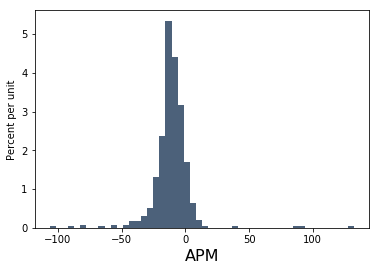

In [22]:
apm.hist('APM', bins=50)

Let's look at the top ranked players.

Geez, who are some of these guys?  Where's Lebron??

What happened?

In [23]:
apm_HCA = apm_dict['HCA']
print("Home Court Advantage for Net Rating: {:.2f}".format(apm_HCA))
print()
print("Top 20 by APM\n" + 40*"=")
apm.sort('APM', descending=True).show(20)
print()
print("Bottom 20 by APM\n" + 40*"=")
apm.sort('APM', descending=False).show(20)

Home Court Advantage for Net Rating: 2.56

Top 20 by APM


Player,APM
Jerrelle Benimon,132.576
Malcolm Lee,93.6164
Sim Bhullar,85.0795
Eric Moreland,38.696
Toure' Murry,13.3057
Lucas Nogueira,12.6539
Sean Kilpatrick,12.1147
David Stockton,10.2613
Stephen Curry,8.39463
C.J. Wilcox,8.29079



Bottom 20 by APM


Player,APM
Julius Randle,-106.443
Bruno Caboclo,-89.1908
David Wear,-80.8084
Kalin Lucas,-78.8952
Mike Malone,-66.3561
Alex Kirk,-57.5857
Patrick Christopher,-56.4504
Glen Rice Jr.,-49.0212
Andrei Kirilenko,-47.9859
Brandon Rush,-43.6257


In [24]:
np.abs(stints["Malcolm Lee"]).sum()

1.0

### Penalizing the Least Squares Fit: Regularized Adjusted Plus Minus (xRAPM)

We just ran into a few issues:
+ Players who we should have dropped due to not having many minutes.  If they have a raw net rating of 200 in 1 possession, the regression will still try to aggressively optimize and give that player a high rating.  We can bucket those players together or force the regression optimizer to not be so aggressive
+ Lineups do not behave like randomized controlled trials.  Given nine players on the court, we can do a really good job predicting the tenth.  Sometimes two players almost always play together.  Or two players switch for each other.
+ This lack of randomization leads to a condition called _multicollinearity_ and is a huge potential problem in multiple regression problems.  Due to issues that can be derived/explained with Linear Algebra, if multicollinearity is present the regression will likely falter and not be able to distinguish well what is happening.  

Our solution is to use something called _penalization_ or _regularization_.

Instead of just aggressively minimizing the mean square error, we reframe the regression to simultaneously minimize mean square error but penalize aggressive fitting by the optimizer.  If the optimization wants to assign a big rating alue to a player, it better have a lot of evidence behind it, ie. the reduction in the least squares needs to offset the penalty imposed.

What exactly is the penalty?  We penalize the sum of squares of the coefficients and we introduce a penalty parameter that quantifies the strength of this penalty.  This parameter is our choice but there are methods (beyond the scope of this demo) that can suggest a good value.

The result of this is a statistic attributed to Jerry Engelmann called _Regularized Adjusted Plus Minus_ or xRAPM.  It is actually the cousin/basis for ESPN's Real Plus/Minus statistic. 

We use a new function to perform this: `multiple_regression_big_with_penalty`.


In [25]:
from regression_helper import multiple_regression_big_with_penalty

rapm_dict = multiple_regression_big_with_penalty(
    'net_rtg', ind_vars, stints, weights='net_poss', penalty=3400.)

rapm = ds.Table().with_columns([
    'Player', players,
    'RAPM', [rapm_dict[p] for p in players]
])
rapm.show(10)

Player,RAPM
A.J. Price,-1.59026
Aaron Brooks,2.08051
Aaron Gordon,-1.92665
Adreian Payne,-3.50721
Al Horford,0.290931
Al Jefferson,-1.08135
Al-Farouq Aminu,4.22562
Alan Anderson,2.48445
Alec Burks,-1.54853
Alex Kirk,-0.737028


This looks way better.  Now we see the people we expect to see at the top.  There are some interesting names at the top like Kyle Korver or Kelly Olynyk.  I certainly would have expected them to rank so high.

Home Court Advantage for Net Rating: 2.63

Top 20 by RAPM


Player,RAPM
Stephen Curry,8.92882
Draymond Green,8.66792
LeBron James,7.80214
Kawhi Leonard,7.72977
Kyle Korver,7.38718
Anthony Davis,7.06756
James Harden,7.05184
Chris Paul,6.37666
Zach Randolph,6.18023
DeMarcus Cousins,6.13593



Bottom 20 by RAPM


Player,RAPM
Brandon Rush,-7.60146
Perry Jones,-6.11035
Martell Webster,-5.84327
Zach LaVine,-5.60154
Anthony Bennett,-5.47278
Andrea Bargnani,-5.30338
Luke Babbitt,-5.14346
Archie Goodwin,-5.12992
Landry Fields,-5.08603
Derrick Williams,-5.04586


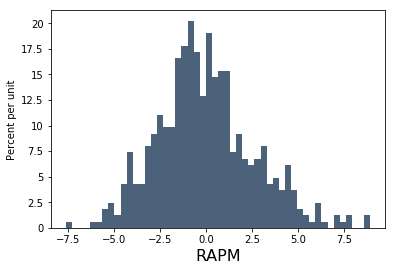

In [26]:
rapm.hist('RAPM', bins=50)

rapm_HCA = rapm_dict['HCA']
print(f"Home Court Advantage for Net Rating: {rapm_HCA:.2f}")
print()
print("Top 20 by RAPM\n" + 40*"=")
rapm.sort('RAPM', descending=True).show(20)
print()
print("Bottom 20 by RAPM\n" + 40*"=")
rapm.sort('RAPM', descending=False).show(20)

### How penalizing the coefficients cleans things up

Let's take a look at some Grizzlies players.  Of particular interest is Kosta Koufos and Marc Gasol.  They are both centers who rarely played together but combined covered most of the possessions at center for the grizzlies.

We shouldn't be so outright dismissive of the APM results just because these three players look "off".  But one thing you can see is how the gap between Koufos and Gasol was shrunk in half (and of course they went from negative to positive).

In [27]:
apm.where('Player', ds.are.contained_in(["Kosta Koufos", "Marc Gasol", "Zach Randolph"]))

Player,APM
Kosta Koufos,-3.6586
Marc Gasol,-5.75652
Zach Randolph,1.9972


In [28]:
rapm.where('Player', ds.are.contained_in(["Kosta Koufos", "Marc Gasol", "Zach Randolph"]))

Player,RAPM
Kosta Koufos,2.57694
Marc Gasol,1.2791
Zach Randolph,6.18023


When looking at all Grizzly players, you see how the ratings are cleaned up a lot.  Note that not all of the relative positionings are the same.  Some players went from negative to positive, some switched order.  This suggests we're doing what we want to do: not just contract everyone's rating towards 0 but find a result that is more stable.

In [29]:
griz_players = ['Jordan Adams', 'Tony Allen', 'Nick Calathes', 'Vince Carter',
       'Mike Conley', 'Marc Gasol', 'JaMychal Green', 'Jeff Green',
       'Kosta Koufos', 'Courtney Lee', 'Jon Leuer', 'Kalin Lucas',
       'Quincy Pondexter', 'Tayshaun Prince', 'Zach Randolph',
       'Russ Smith', 'Jarnell Stokes', 'Tyrus Thomas', 'Beno Udrih']
apm.where('Player', ds.are.contained_in(griz_players)).show(19)

Player,APM
Beno Udrih,-13.9473
Courtney Lee,-9.40777
JaMychal Green,-14.3699
Jarnell Stokes,-17.3352
Jeff Green,-18.3214
Jon Leuer,-15.7943
Jordan Adams,-7.44116
Kalin Lucas,-78.8952
Kosta Koufos,-3.6586
Marc Gasol,-5.75652


In [30]:
rapm.where('Player', ds.are.contained_in(griz_players)).show(19)

Player,RAPM
Beno Udrih,-1.20759
Courtney Lee,0.970357
JaMychal Green,-0.447767
Jarnell Stokes,0.26266
Jeff Green,-4.06567
Jon Leuer,-1.63962
Jordan Adams,0.843452
Kalin Lucas,-0.415726
Kosta Koufos,2.57694
Marc Gasol,1.2791


### Compare to ESPN's RPM

We can compare our results ESPN's Real Plus/Minus statistic.

Compared against overall RPM from 2014-15, our rating is actually that not that bad.  We're overrating players a bit and maybe using more years would help.  RPM actually uses box score data and some biographic data to help stabilize the regression further.  We are working purely with lineup data so if they are doing things well, that extra data will improve things for them.

Also note that ESPN produces Offensive RPM and Defensive RPM. To do this, we need to break up the stint data into offense and defense performance and have _two_ effects for each player, one for offense and one for defense.

They also convert RPM to Wins, presumably using something like the pythagorean expectation formula.  Kevin Pelton's WARP statistic does similarly.

In [31]:
rpm = ds.Table.read_table('rpm.csv', sep=',')
rpm.show(20)

RK,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
1,"Stephen Curry, PG",GS,80,32.7,7.43,1.91,9.34,20.07
2,"LeBron James, SF",CLE,69,36.1,6.02,2.76,8.78,17.03
3,"James Harden, PG",HOU,81,36.8,8.66,-0.16,8.5,20.63
4,"Anthony Davis, PF",NO,68,36.1,3.98,4.2,8.18,15.86
5,"Kawhi Leonard, SF",SA,64,31.8,2.98,4.59,7.57,12.67
6,"Russell Westbrook, PG",OKC,67,34.4,7.79,-0.71,7.08,14.15
7,"Chris Paul, PG",LAC,82,34.8,6.45,0.47,6.92,16.75
8,"Draymond Green, PF",GS,79,31.5,1.57,5.23,6.8,14.8
9,"DeMarcus Cousins, C",SAC,59,34.1,1.41,4.71,6.12,10.86
10,"Khris Middleton, SF",MIL,79,30.1,1.97,4.09,6.06,12.42
